In [35]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

train = pd.read_csv(r'C:\Users\안재우\Desktop\CUAI_project\train\train.csv')
train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False


In [36]:
features = pd.read_csv(r'C:\Users\안재우\Desktop\CUAI_project\features\features.csv')
features.head(3)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False


In [37]:
stores = pd.read_csv(r'C:\Users\안재우\Desktop\CUAI_project\stores.csv')
stores.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [38]:
test = pd.read_csv(r'C:\Users\안재우\Desktop\CUAI_project\test\test.csv')
test.head(3)

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False


In [39]:
train = pd.merge(train, stores, on = 'Store', how = 'left')
train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315


In [40]:
test = pd.merge(test, stores, on = 'Store', how = 'left')
test.head(3)

,Store,Dept,Date,IsHoliday,Type,Size
0,1,1,2012-11-02,False,A,151315
1,1,1,2012-11-09,False,A,151315
2,1,1,2012-11-16,False,A,151315


In [41]:
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])
test['Date'] = pd.to_datetime(test['Date'])

In [42]:
train = pd.merge(train, features, on = ['Store', 'Date', 'IsHoliday'], how = 'left')
test = pd.merge(test, features, on = ['Store', 'Date', 'IsHoliday'], how = 'left')
train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,A,151315,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106


In [43]:
test.head(3)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573
1,1,1,2012-11-09,False,A,151315,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573
2,1,1,2012-11-16,False,A,151315,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573


In [44]:
train['Year'] = train['Date'].dt.year
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['Week'] = np.ceil(train['Day']/7)

test['Year'] = test['Date'].dt.year
test['Month'] = test['Date'].dt.month
test['Day'] = test['Date'].dt.day
test['Week'] = np.ceil(test['Day']/7)

In [45]:
train = train.join(pd.get_dummies(train['Type']))

In [46]:
test = test.join(pd.get_dummies(test['Type']))

In [47]:
train = train.drop('Type', axis=1)
test = test.drop('Type', axis=1)

In [48]:
train['MarkDown1'] = train['MarkDown1'].fillna(0)
train['MarkDown2'] = train['MarkDown2'].fillna(0)
train['MarkDown3'] = train['MarkDown3'].fillna(0)
train['MarkDown4'] = train['MarkDown4'].fillna(0)
train['MarkDown5'] = train['MarkDown5'].fillna(0)

In [49]:
test['MarkDown1'] = test['MarkDown1'].fillna(0)
test['MarkDown2'] = test['MarkDown2'].fillna(0)
test['MarkDown3'] = test['MarkDown3'].fillna(0)
test['MarkDown4'] = test['MarkDown4'].fillna(0)
test['MarkDown5'] = test['MarkDown5'].fillna(0)

In [50]:
train['IsHoliday'] = train['IsHoliday'].apply(lambda x : 1 if x == True else 0)
test['IsHoliday'] = test['IsHoliday'].apply(lambda x : 1 if x == True else 0)

In [51]:
train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown5,CPI,Unemployment,Year,Month,Day,Week,A,B,C
0,1,1,2010-02-05,24924.50,0,151315,42.31,2.572,0.0,0.0,...,0.0,211.096358,8.106,2010,2,5,1.0,1,0,0
1,1,1,2010-02-12,46039.49,1,151315,38.51,2.548,0.0,0.0,...,0.0,211.242170,8.106,2010,2,12,2.0,1,0,0
2,1,1,2010-02-19,41595.55,0,151315,39.93,2.514,0.0,0.0,...,0.0,211.289143,8.106,2010,2,19,3.0,1,0,0


In [52]:
test.head(3)

,Store,Dept,Date,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,Year,Month,Day,Week,A,B,C
0,1,1,2012-11-02,0,151315,55.32,3.386,6766.44,5147.70,50.82,...,2737.42,223.462779,6.573,2012,11,2,1.0,1,0,0
1,1,1,2012-11-09,0,151315,61.24,3.314,11421.32,3370.89,40.28,...,6154.16,223.481307,6.573,2012,11,9,2.0,1,0,0
2,1,1,2012-11-16,0,151315,52.92,3.252,9696.28,292.10,103.78,...,6612.69,223.512911,6.573,2012,11,16,3.0,1,0,0


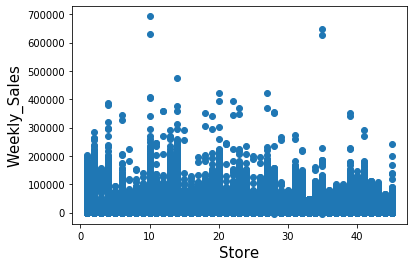

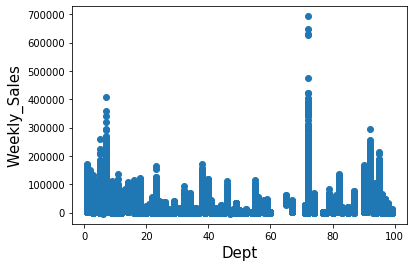

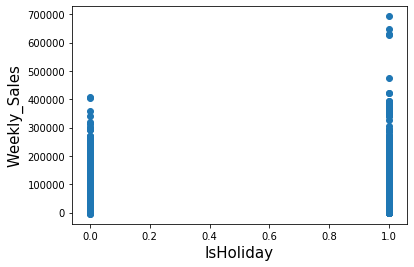

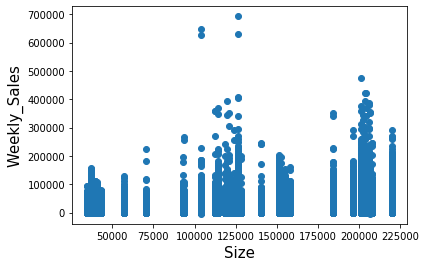

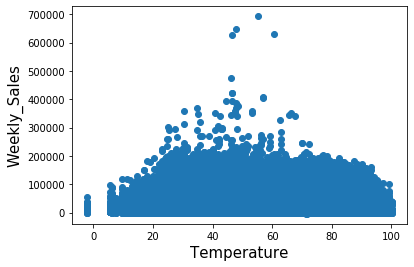

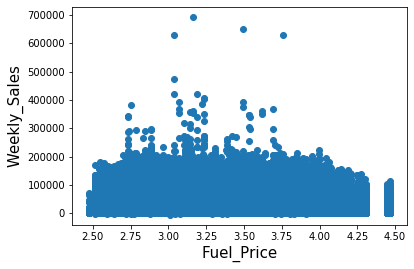

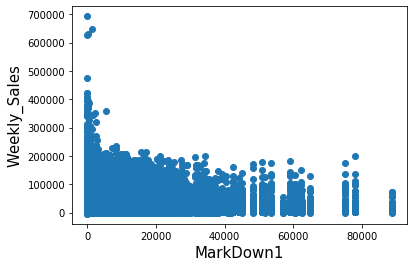

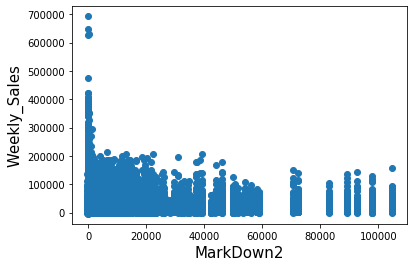

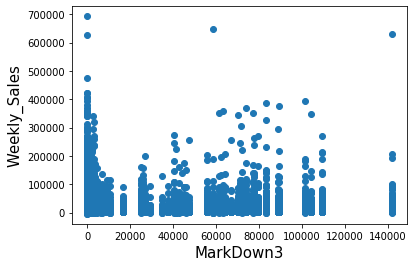

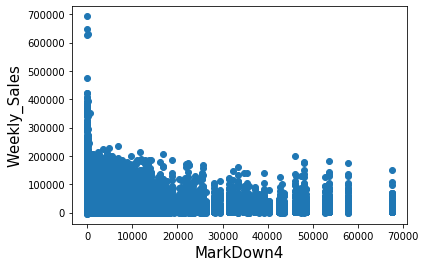

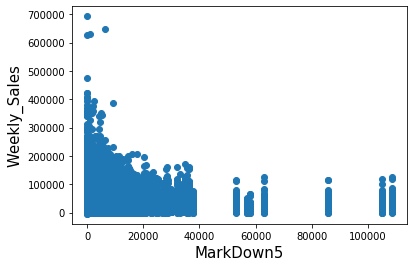

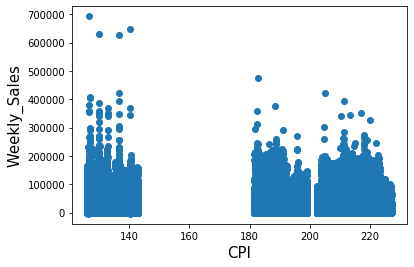

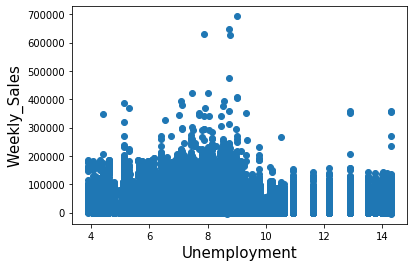

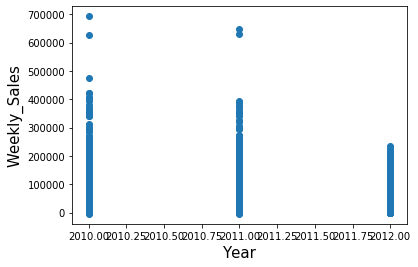

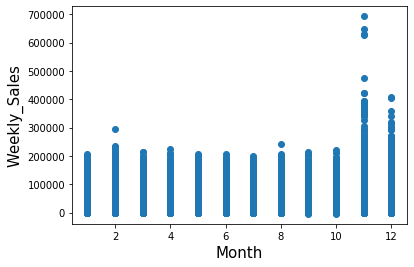

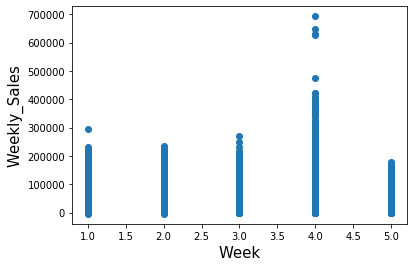

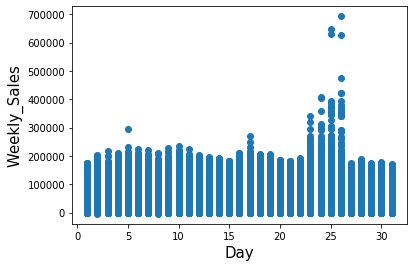

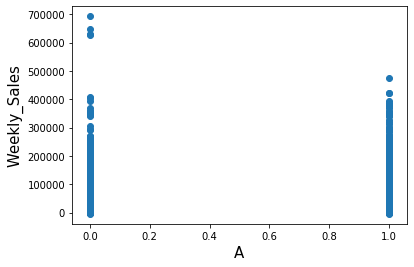

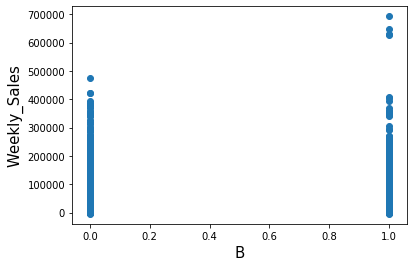

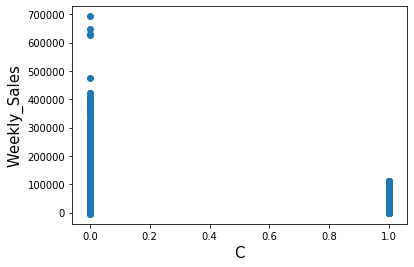

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

def scatter(column):
    plt.scatter(x = train[column], y = train['Weekly_Sales'])
    plt.ylabel('Weekly_Sales', fontsize = 15)
    plt.xlabel(column, fontsize = 15)
    plt.show()

columns = ['Store', 'Dept', 'IsHoliday', 'Size', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5',
            'CPI', 'Unemployment', 'Year','Month', 'Week', 'Day', 'A', 'B', 'C']


for column in columns:
    scatter(column)

In [54]:
train = train.drop(['CPI', 'Unemployment', 'Year', 'Day'], axis=1)
test = test.drop(['CPI', 'Unemployment', 'Year', 'Day'], axis=1)

In [55]:
train = train.join(pd.get_dummies(train['Week']))
test = test.join(pd.get_dummies(test['Week']))

In [56]:
train = train.drop('Week', axis=1)
test = test.drop('Week', axis=1)

In [57]:
train.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown5,Month,A,B,C,1.0,2.0,3.0,4.0,5.0
0,1,1,2010-02-05,24924.50,0,151315,42.31,2.572,0.0,0.0,...,0.0,2,1,0,0,1,0,0,0,0
1,1,1,2010-02-12,46039.49,1,151315,38.51,2.548,0.0,0.0,...,0.0,2,1,0,0,0,1,0,0,0
2,1,1,2010-02-19,41595.55,0,151315,39.93,2.514,0.0,0.0,...,0.0,2,1,0,0,0,0,1,0,0


In [58]:
test.head(3)

,Store,Dept,Date,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,Month,A,B,C,1.0,2.0,3.0,4.0,5.0
0,1,1,2012-11-02,0,151315,55.32,3.386,6766.44,5147.70,50.82,...,2737.42,11,1,0,0,1,0,0,0,0
1,1,1,2012-11-09,0,151315,61.24,3.314,11421.32,3370.89,40.28,...,6154.16,11,1,0,0,0,1,0,0,0
2,1,1,2012-11-16,0,151315,52.92,3.252,9696.28,292.10,103.78,...,6612.69,11,1,0,0,0,0,1,0,0


In [61]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

y_target = train['Weekly_Sales']
X_data = train.drop(['Date','Weekly_Sales'], axis = 1, inplace = False)

X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state=0)

rf= RandomForestRegressor(random_state = 0, n_estimators = 100, n_jobs=-1)
rf.fit(X_data, y_target)
pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, pred)
rmse = np.sqrt(mean_squared_error(y_test, pred))

print('MAE : {0:.3f}, RMSE : {1:.3f}'.format(mae, rmse))

MAE : 512.799, RMSE : 1252.584
